In [213]:
import pandas as pd
import numpy as np

In [214]:
pd.__version__

'2.2.2'

In [215]:
#data="https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [216]:
#!wget $data

In [217]:
df=pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

In [218]:
df.columns=df.columns.str.lower().str.replace(" ", "_")

In [219]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [220]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [221]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [222]:
for col in strings:
    df[col]= df[col].str.lower().str.replace(' ', '_')

In [223]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [224]:
# 2.3 video

In [225]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
        
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [226]:
%%markdown 
Price Distribution

Price Distribution


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

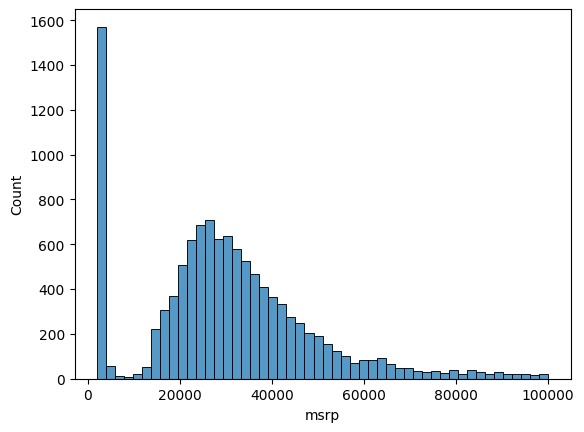

In [228]:
sns.histplot(df.msrp[df.msrp < 1e5], bins=50)
#bins is the number of columns displayed

In [229]:
print(1e5)

100000.0


In [230]:
#longtail distribution

In [231]:
np.log([0+1, 1+1,10+1,1000+1,1e5+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [232]:
np.log1p([0, 1,10,1000,1e5])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [233]:
price_logs = np.log1p(df.msrp)

In [234]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

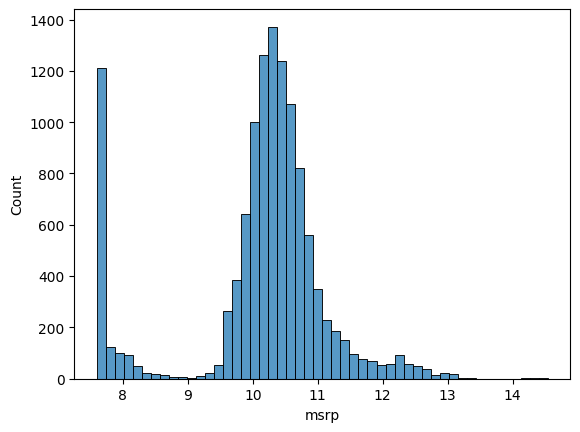

In [235]:
sns.histplot(price_logs, bins=50)
# we are dealing with long-tail distribution

In [236]:
#got normal distribution

In [237]:
#find missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [238]:
#Setting up the validation framework

## Train -- Validation -- Testing

In [239]:
n_val = int(len(df) * .2)
n_test = int(len(df) * .2)
n_train = len(df) - n_val - n_test
print(n_val)
print("Training records", n_train)

2382
Training records 7150


In [240]:
df.iloc[1]

make                                         bmw
model                                   1_series
year                                        2011
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  300.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category               luxury,performance
vehicle_size                             compact
vehicle_style                        convertible
highway_mpg                                   28
city_mpg                                      19
popularity                                  3916
msrp                                       40650
Name: 1, dtype: object

In [241]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val*2]
df_train = df.iloc[n_val*2:]

In [242]:
n = len(df)

In [243]:
idx = np.arange(n)

In [244]:
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [245]:
np.random.seed(2)
np.random.shuffle(idx)

In [246]:
df_train = df.iloc[idx[n_val*2:]]
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val*2]]


In [247]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [248]:
len(df) == len(df_train) + len(df_val) + len(df_test)

True

In [249]:
df_train = df_train.reset_index()
df_val = df_val.reset_index()
df_test= df_test.reset_index()

In [250]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [251]:
del(df_train['msrp'])
del(df_val['msrp'])
del(df_test['msrp'])

In [252]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              7150 non-null   int64  
 1   make               7150 non-null   object 
 2   model              7150 non-null   object 
 3   year               7150 non-null   int64  
 4   engine_fuel_type   7148 non-null   object 
 5   engine_hp          7107 non-null   float64
 6   engine_cylinders   7130 non-null   float64
 7   transmission_type  7150 non-null   object 
 8   driven_wheels      7150 non-null   object 
 9   number_of_doors    7147 non-null   float64
 10  market_category    4913 non-null   object 
 11  vehicle_size       7150 non-null   object 
 12  vehicle_style      7150 non-null   object 
 13  highway_mpg        7150 non-null   int64  
 14  city_mpg           7150 non-null   int64  
 15  popularity         7150 non-null   int64  
dtypes: float64(3), int64(5),

In [253]:
len(y_train)

7150

## 2.5 Linear Regression

In [254]:
df_train.iloc[10]

index                           10599
make                        chevrolet
model                 trailblazer_ext
year                             2004
engine_fuel_type     regular_unleaded
engine_hp                       275.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                    large
vehicle_style                 4dr_suv
highway_mpg                        18
city_mpg                           13
popularity                       1385
Name: 10, dtype: object

In [255]:
xi = [275, 13, 1385]

In [256]:
def g(xi):
    #does something
    return 1e4

In [257]:
g(xi)

10000.0

In [258]:
w0= 7.17
w = [0.01,0.04,0.002]

In [259]:
def linear_regression(xi):
    n = len(xi)

    pred = w0
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred
    

In [260]:
linear_regression(xi)

13.209999999999999

In [261]:
np.expm1(13.209999999999999)

np.float64(545794.6951524466)

In [262]:
np.log1p(545794.6951524466)

np.float64(13.209999999999999)

### Creating a model

In [263]:
w_new = [7.17, 0.01, 0.04, 0.002]


In [264]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [265]:
def linear_regression(X):
    return X.dot(w_new)

In [266]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### Gram Matrix

## Training linerar regression model

In [267]:
X=[
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86],

    [158,   24, 185],
    [172,   25, 201],
    [413,   11,   86],

    [38,   54, 185],
    [142,   25, 431],
    [453,   31,   86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [268]:
XTX=X.T.dot(X)

In [269]:
XTX_inv=np.linalg.inv(XTX)

In [270]:
XTX_inv.dot(XTX).round(4)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [271]:
y=np.array([100,200,150,250,100,200,150,250,120]) #prices

In [272]:
y.shape

(9,)

In [273]:
X.shape[0]

9

In [274]:
assert y.shape[0], X.shape[0]

In [275]:
w=XTX_inv.dot(X.T).dot(y)

In [276]:
w

array([0.26190562, 3.06101252, 0.03696909])

Forgot to include the bias term

In [277]:
#Not needed per cell 71
#ones = np.ones(X.shape[0])

In [278]:
#X = np.column_stack([ones, X])

In [279]:
XTX=X.T.dot(X)
XTX_inv=np.linalg.inv(XTX)

In [280]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([0.26190562, 3.06101252, 0.03696909])

In [281]:
w0 = w_full[0]
w = w_full[1:]

In [282]:
w0, w

(np.float64(0.2619056150598928), array([3.06101252, 0.03696909]))

In [283]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX=X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]
    

In [284]:
train_linear_regression(X,y)

(np.float64(300.0677669255554), array([-0.22774253, -2.5769413 , -0.02301206]))

## 2.8 Car price baseline model

In [285]:
df_train.columns

Index(['index', 'make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [286]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity',]

In [287]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [288]:

X_train=df_train[base].fillna(0).values


In [289]:
y_train

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162])

In [290]:
w0, w = train_linear_regression(X_train, y_train)

In [291]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

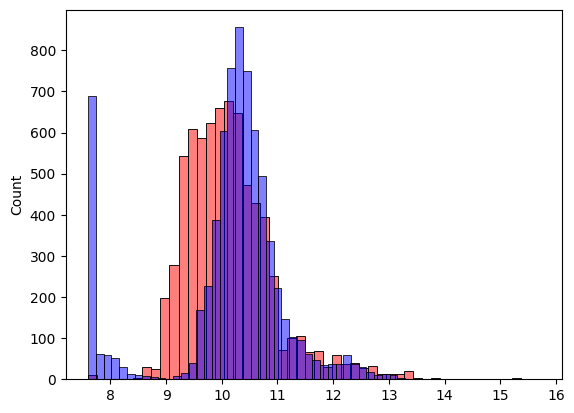

In [292]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## 2.9 RMSE - Root mean squared error

**Root mean squared error** 
$$RMSE=\sqrt{ 1/m\sum_{i=1}^m \left(g\left(x_i\right) - y_i\right)^2 }$$

In [293]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [294]:
rmse(y_train, y_pred)

np.float64(0.745130516822012)

### 2.9 Valdiating the model

In [295]:
#training the model

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity',]
X_train=df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)


In [296]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [297]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0+ X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7419381478118969)

In [298]:
df_train

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720
1,6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640
2,11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439
3,569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819
4,1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
7146,11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
7147,6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
7148,2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202


In [299]:
#when the data had been collected at the time of data collection
df_train.year.max()

np.int64(2017)

In [300]:
2017 - df_train.year

0        9
1        1
2        1
3        0
4       12
        ..
7145    19
7146     3
7147    11
7148     1
7149     2
Name: year, Length: 7150, dtype: int64

In [301]:
#Its better to make a copy of the dataframe b/c of the column we are going to add.
#we don't want to make irreversable changes to the dataframe

In [302]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    #print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [303]:
X_train = prepare_X(df_train)


In [304]:
X_train

array([[1.620e+02, 4.000e+00, 2.600e+01, 1.900e+01, 1.720e+03, 9.000e+00],
       [1.750e+02, 4.000e+00, 3.600e+01, 2.600e+01, 6.400e+02, 1.000e+00],
       [1.320e+02, 4.000e+00, 3.500e+01, 2.700e+01, 1.439e+03, 1.000e+00],
       ...,
       [2.500e+02, 6.000e+00, 2.200e+01, 1.500e+01, 1.851e+03, 1.100e+01],
       [1.740e+02, 4.000e+00, 4.200e+01, 3.100e+01, 2.202e+03, 1.000e+00],
       [2.560e+02, 6.000e+00, 2.700e+01, 2.000e+01, 6.400e+02, 2.000e+00]])

### Let's check the newly created data

In [305]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0+ X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5222394405268986)

<Axes: ylabel='Count'>

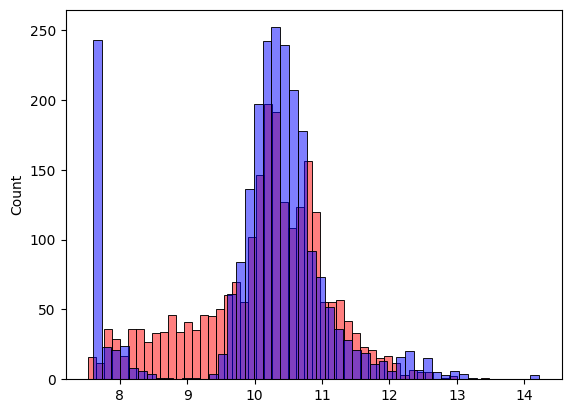

In [306]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## 2.12 Categorical variables

In [307]:
df_train.dtypes

index                  int64
make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [308]:
#All Objects are catergorical variables (in this dataset)

In [309]:
df_train.number_of_doors

0       4.0
1       4.0
2       3.0
3       2.0
4       4.0
       ... 
7145    3.0
7146    4.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [310]:
(df_train.number_of_doors ==4).astype('int')

0       1
1       1
2       0
3       0
4       1
       ..
7145    0
7146    1
7147    1
7148    1
7149    1
Name: number_of_doors, Length: 7150, dtype: int64

In [311]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int') 
        features.append('num_doors_%s' % v)
    
    
    #print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [312]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0+ X_val.dot(w)

rmse(y_val, y_pred)



np.float64(0.521013765682513)

In [313]:
list(df.make.value_counts().head(6).index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 'nissan']

In [318]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 'nissan']:
        df['make_%s' % v] = (df.make == v).astype('int') 
        features.append('make_%s' % v)
    
    
    #print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [319]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0+ X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5056850043625197)

In [320]:
df_train.dtypes

index                  int64
make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [321]:
df_train.engine_fuel_type.nunique()

10

In [324]:
categorical_variables = ['engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style', 'make']
categories = {}
for c in categorical_variables:
    categories[c]=list(df[c].value_counts().head().index)
categories   

{'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']}

In [327]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for c, values in categories.items():
        for v in values:
            df['%s_%s' %(c,v)] = (df[c] == v).astype('int') 
            features.append('%s_%s' %(c,v))
    
    
    #print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [328]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0+ X_val.dot(w)

rmse(y_val, y_pred)

np.float64(78.21012398454911)

In [330]:
int(w0)

-22820172153868852